##  1. Problem Statement

The current process suffers from the following problems:

* One issue is that only about **10%** of the **customers** do enough trades for earnings after discounts to be profitable.

* The company wants to figure out, which are those 10% customers so that it can selectively offer them a **discount**.

The marketing department has hired you as a data science consultant because they want to supplement their campaigns with a more proactive approach.

### Role

* Given datasets of past customers and their status (Revenue Grid 1 or 2).
* Task is to build a classification model using the datasets.
* Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

### Project Deliverables

* Deliverable: **Predict whether a customer belongs to a high net worth or low net worth group.**
* Machine Learning Task: **Classification**
* Target Variable: **Status (high net worth (1) / low net worth (2))**
* Win Condition: **N/A (best possible model)**


## 2. Importing Packages

In [1]:
import numpy as np                     
#import dtale                                       # Auto EDA module
#import sweetviz as sv
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
#pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

from pandas_profiling import ProfileReport  #for auto EDA report

import warnings
warnings.filterwarnings('ignore')  

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

# Install and update plotly using this command to the latest version (higher than version 4.0.0)

#!pip install plotly --upgrade
import plotly.graph_objs as go

In [2]:
df_train = pd.read_csv('existing_base_train.csv') #importing dataset

# Dataset Feature Description

### Description of the Dataset :

|Column Name	                              | Description                                                                   |
| --------------------------------------------|------------------------------------------------------------------------------:| 
| REF_NO	                                  | Reference Number of the customer.                                             |
| children	                                  | Number of children each customer has.                                         | 
| Age_band	                                  | Age Group to which the customer belongs.                                      |
| status	                                  | Marital Status of the customer.                                               |
| occupation	                              | Job or profession of the customer.                                            |
| occupation_partner	                      | Job or profession of the customer's partner.                                  |
| home_status	                              | Home Status of the customers.                                                 |
| family_income	                              | Income Range of the customer's family.                                        |
| self_employed	                              | Whether self-employed or not.                                                 |
| self_employed_partner	                      | Whether the partner self-employed or not.                                     |
| year_last_moved	                          | Moving Year from the last location of the customer.                           |
| TVarea	                                  | Television Region of the customer.                                            |
| post_code	                                  | Postal Code of the customer.                                                  |
| post_area	                                  | Postal Area of the customer.                                                  |  | Average_Credit_Card_Transaction	           | Average Credit Card Transaction per year by the customer.                     |
| Balance_Transfer	                          | Transfer of the Balance in an account to another account by the customer.     |
| Term_Deposit	                              | Cash Investment Help at Financial Institute provided to the customer.         |
| Life_Insurance	                          | Basic Life Insurance Coverage of the customer.                                |
| Medical_Insurance	                          | Medical Insurance Coverage of the customer.                                   |
| Average_A/C_Balance	                      | Average Balance in the account of the customer.                               |
| Personal_Loan	                              | Amount of Personal Loan taken by the customer.                                |
| Investment_in_Mutual_Fund	                  | Amount Invested in Mutual Funds by the customer.                              |
| Investment_Tax_Saving_Bond	              | Amount Invested in Tax Saving Bond by the customer.                           |
| Home_Loan	                                  | Amount of Home Loan taken by the customer.                                    |
| Online_Purchase_Amount	                  | Amount spent by the customer on online purchases.                             |
| gender	                                  | Gender of the customer.                                                       |
| region	                                  | Religion of the customer.                                                     | 
| Investment_in_Commudity	                  | Amount Invested in Commodity by the customer.                                 |
| Investment_in_Equity	                      | Amount Invested in Equity by the customer.                                    |
| Investment_in_Derivative	                  | Amount Invested in Derivatives by the customer.                               |
| Portfolio_Balance	                          | Balanced Investment Strategy of the customer.                                 |
| **Revenue_Grid**	                          | **Grid report of the customers.**                                             |

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [24]:
df_train.nunique(axis=0).sort_values(ascending=False)# returns the number of unique values for each variable.

REF_NO                             8124
post_code                          8050
Portfolio_Balance                  6884
Investment_in_Derivative           3269
Investment_in_Commudity            3081
Investment_in_Equity               2812
Life_Insurance                     2655
Investment_in_Mutual_Fund          2130
post_area                          1937
Average_A/C_Balance                1923
Balance_Transfer                   1860
Personal_Loan                      1477
Medical_Insurance                  1362
Term_Deposit                       1215
Average_Credit_Card_Transaction    1209
Online_Purchase_Amount             1128
Home_Loan                           760
Investment_Tax_Saving_Bond          718
year_last_moved                      94
TVarea                               14
family_income                        13
region                               13
age_band                             12
occupation_partner                    8
occupation                            8


From the above we could observe there are no **missing values** present

- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **8124 samples (rows)** and **31 columns** in the dataframe.
  
  - There are **3 columns** with a **numeric** datatype and **13 columns** with an **object** datatype & **15 columns** with an **float** datatype
  
  - There are **0 missing** values in the data.

In [4]:
df_train.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [5]:
df_train.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [6]:
#profile = ProfileReport(df_train, title="Pandas Profiling Report")
#profile.to_file("EDA_tain.html")

## EDA Approch

* EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods.
* EDA is used for seeing what the data can tell us before the modeling task.
* It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data.
*       It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers.
* Exploratory data analysis techniques have been devised as an aid in this situation.


Exploratory data analysis is generally cross-classified in **two** ways.

* First, each method is either **non-graphical** or **graphical**.
* second, each method is either **univariate** or **multivariate** (usually just bivariate).

### Univariate Analysis
 Univariate analysis is the simplest form of data analysis, where the data being analyzed consists of only one variable.
Since it’s a single variable, it doesn’t deal with causes or relationships.
The main purpose of the univariate analysis is to describe the data and find patterns that exist within it.
Visualizations used for performing univariate analysis:
* Line Chart
* Histogram

### Multivariate analysis
Multivariate data analysis refers to any statistical technique used to analyze data that arises from more than one variable.
This model’s more realistic applications, where each situation, product, or decision involves more than a single variable.
Visualizations used for performing multivariate analysis:
* Scatter Plot
* Heatmap

In [7]:
df_train.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [8]:
df_train.Revenue_Grid.unique() # only two values in the Target variable 

array([2, 1], dtype=int64)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [10]:
df_train.children.value_counts()

Zero    4991
1       1474
2       1271
3        375
4+        13
Name: children, dtype: int64

In [11]:
 # replace strin zero with actual 0 , treat 4+ as 4  & convert data type to number
df_train['children']=df_train['children'].replace('Zero',0)
df_train['children']=df_train['children'].replace('4+',4) 
df_train.children.value_counts()
df_train['children']=df_train['children'].astype(int)

In [12]:
# replace unknow values age band with mode 45-50 
df_train.age_band.value_counts().sort_values(ascending=False)
df_train['age_band']=df_train['age_band'].replace('Unknown','45-50') 
df_train['age_band']=df_train['age_band'].replace('71+','71-99') 
df_train.age_band.value_counts().sort_values(ascending=False)

45-50    1142
41-45     903
36-40     895
55-60     865
31-35     840
51-55     833
26-30     735
61-65     700
65-70     468
22-25     356
71-99     337
18-21      50
Name: age_band, dtype: int64

In [13]:
#replace unknow values with maximum class name
df_train.status.value_counts()
df_train['status']=df_train['status'].replace('Unknown','Partner') 
df_train.status.value_counts()

Partner                 6164
Single/Never Married     881
Divorced/Separated       569
Widowed                  510
Name: status, dtype: int64

In [14]:
df_train.occupation.value_counts()
df_train['occupation']=df_train['occupation'].replace('Unknown','Professional')

In [15]:
df_train.occupation_partner.value_counts()
df_train['occupation_partner']=df_train['occupation_partner'].replace('Unknown','Other')

In [16]:
df_train.home_status.value_counts()
df_train['home_status']=df_train['home_status'].replace('Unclassified','Own Home')

In [18]:
#rearrange the group names 
df_train.family_income.value_counts()

>=35,000             2014
<27,500, >=25,000     969
<30,000, >=27,500     796
<25,000, >=22,500     656
<12,500, >=10,000     535
<20,000, >=17,500     525
<17,500, >=15,000     521
<15,000, >=12,500     508
<22,500, >=20,000     479
<10,000, >= 8,000     452
< 8,000, >= 4,000     328
< 4,000               233
Unknown               108
Name: family_income, dtype: int64

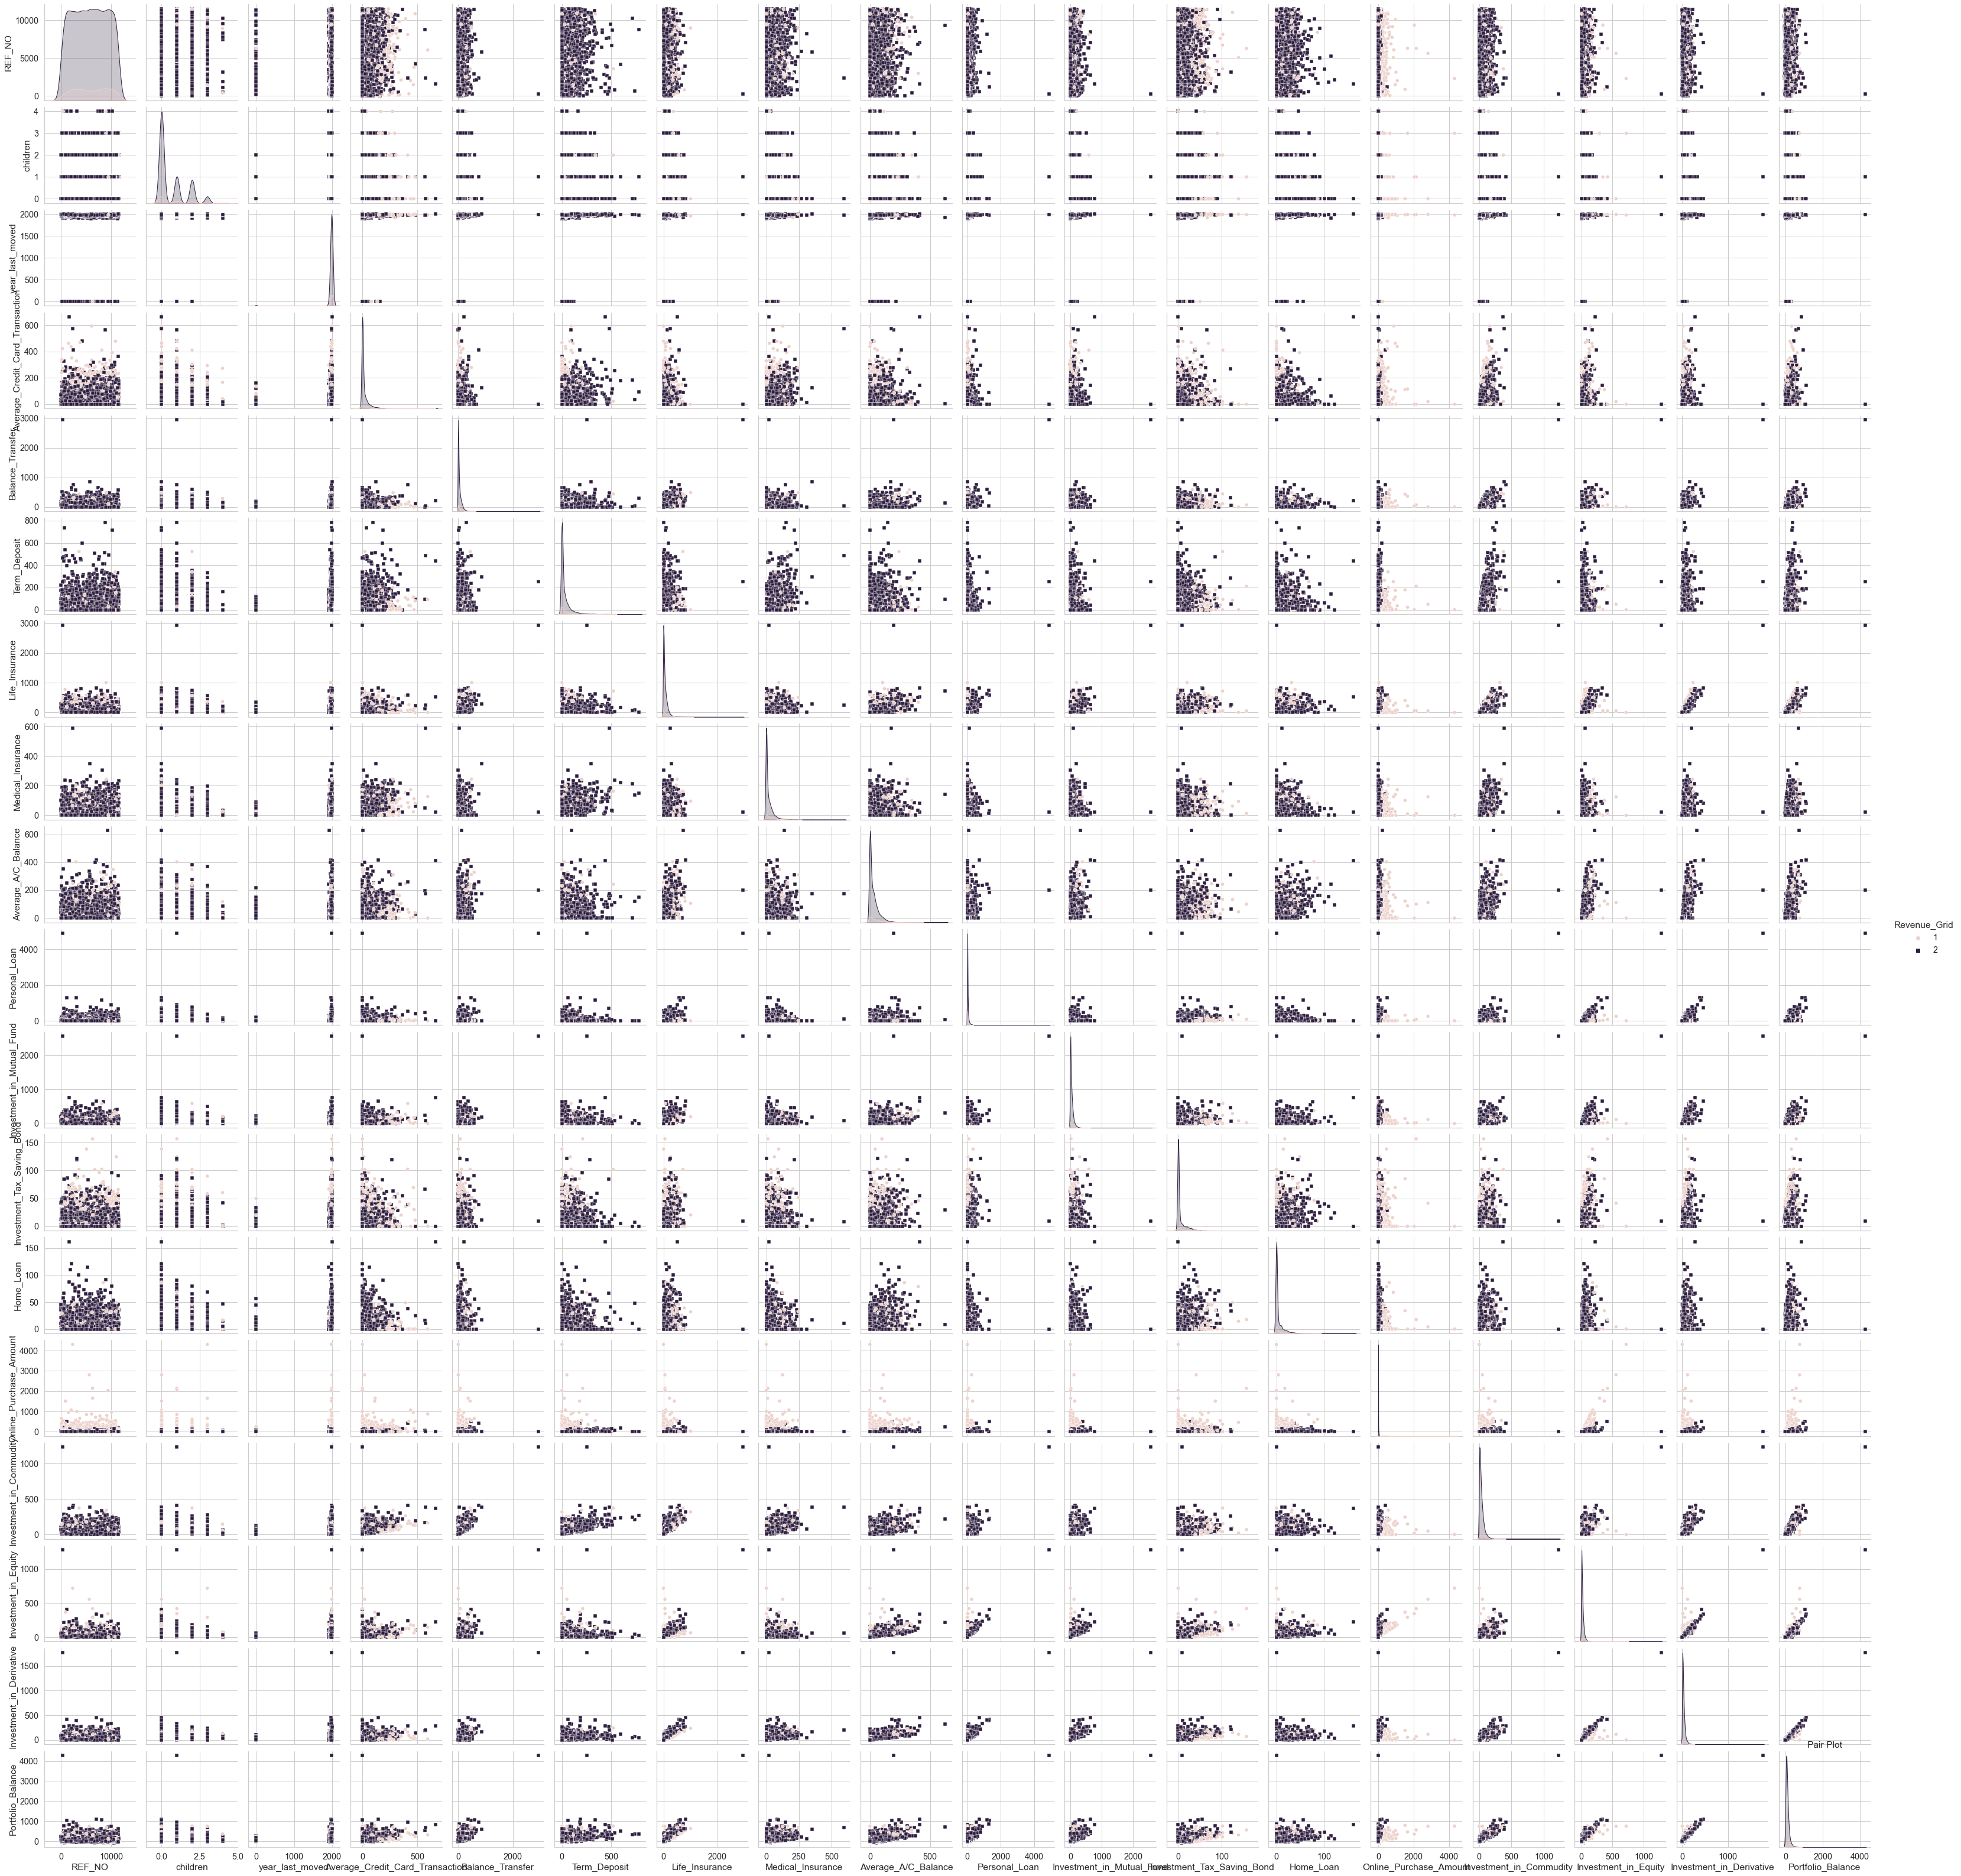

In [57]:
#sns.pairplot(df_train, hue='Revenue_Grid', dropna=True, markers=['o','s'])
#plt.title("Pair Plot");

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   int32  
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [21]:
df_train.Revenue_Grid.value_counts()

2    7264
1     860
Name: Revenue_Grid, dtype: int64

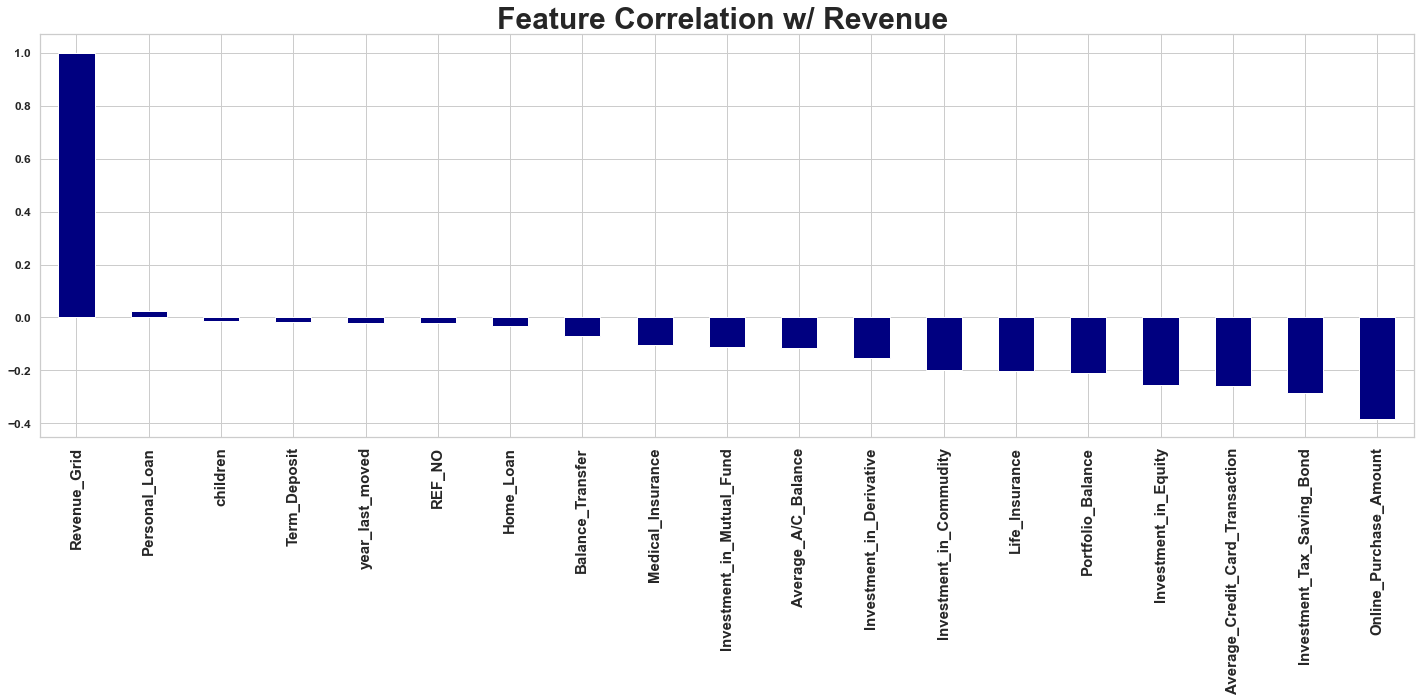

In [30]:
# Plot correlations between our features and our target feature, churn, as a bar plot, sort by descending order
df_train.corr()['Revenue_Grid'].sort_values(ascending = False).plot(kind='bar', figsize = (20, 10), color = 'Navy')
plt.title('Feature Correlation w/ Revenue ', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.tight_layout()


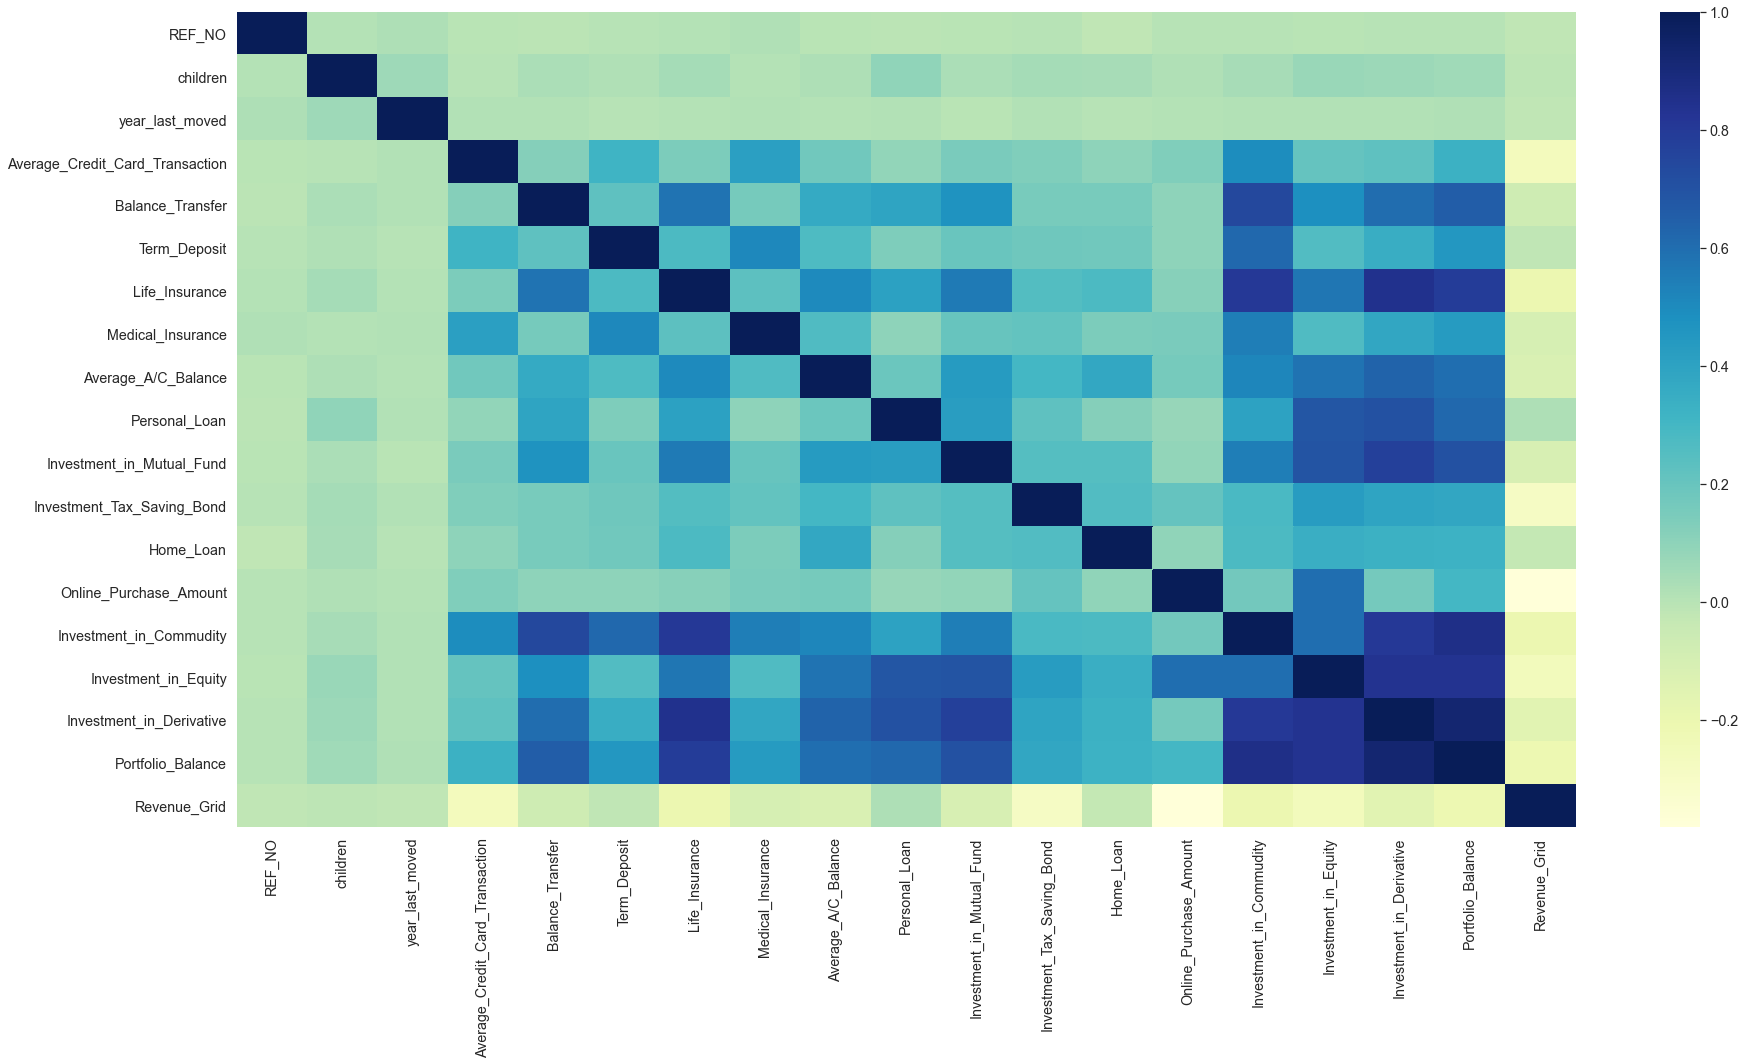

In [31]:
# Visualize a heatmap for our features correlation values
plt.figure(figsize = (30, 15))
x = sns.heatmap(df_train.corr(), cmap = 'YlGnBu')